In [1]:
%matplotlib inline

## Partial Dependence plots
- function returns a Partial Dependence Display object - this allows plotting without needing to recalculate the PD.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets       import load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing  import StandardScaler
from sklearn.pipeline       import make_pipeline
from sklearn.tree           import DecisionTreeRegressor
from sklearn.inspection     import plot_partial_dependence

In [5]:
diabetes = load_diabetes()
X        = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y        = diabetes.target
tree     = DecisionTreeRegressor()
mlp      = make_pipeline(StandardScaler(),
                         MLPRegressor(hidden_layer_sizes = (100, 100),
                                      tol                = 1e-2, 
                                      max_iter           = 5000,
                                      random_state       = 0))
tree.fit(X, y)
mlp.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=5000,
                              random_state=0, tol=0.01))])

- Plot PD curves for "age" and "BMI" (body mass index) for the decision tree.
- PD expects to plot two curves for two features.

/home/bjpcjp/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


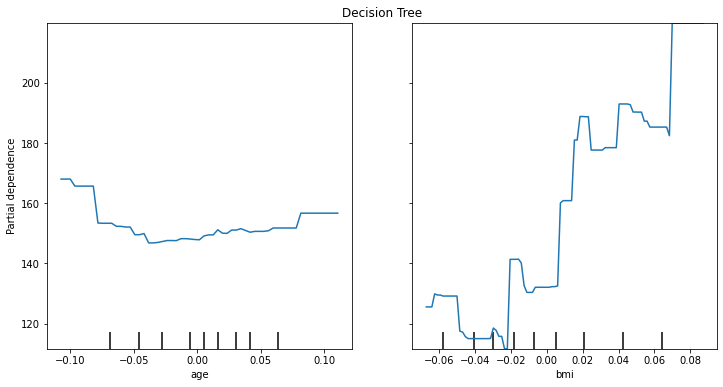

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = plot_partial_dependence(tree, X, ["age", "bmi"], ax=ax)

- PD curves can be used with Multilayer Perceptrons.

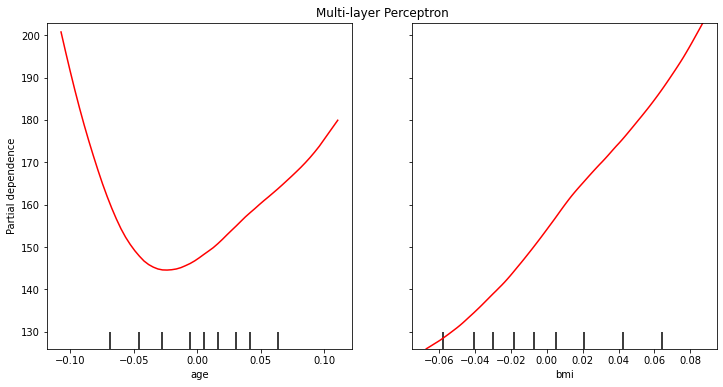

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = plot_partial_dependence(mlp, X, ["age", "bmi"], ax=ax,
                                   line_kw={"c": "red"})

- ```tree_disp``` and ```mlp_disp``` display objects contain everything needed to recreate their PD curves, so we can easily reuse the data.
- Below: placing the above curves in the same figure.

Text(0.5, 1.0, 'Multi-layer Perceptron')

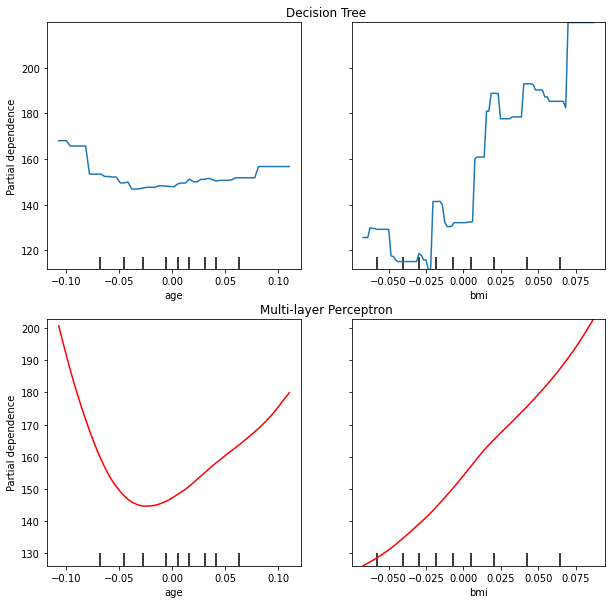

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
tree_disp.plot(ax=ax1)
ax1.set_title("Decision Tree")
mlp_disp.plot(ax=ax2, line_kw={"c": "red"})
ax2.set_title("Multi-layer Perceptron")

- Another variation: plotting on top of each other.

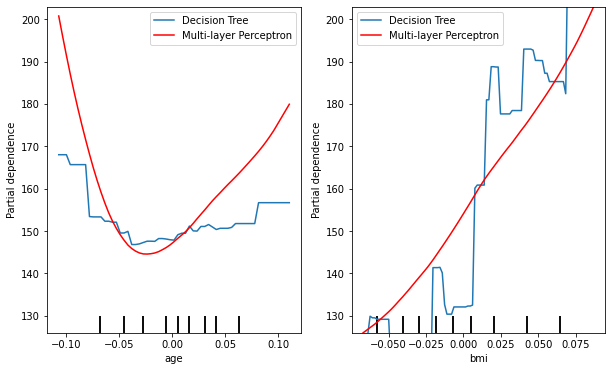

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree"})
mlp_disp.plot(ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron",
                                      "c": "red"})
ax1.legend()
ax2.legend()

- Another method of combining plots

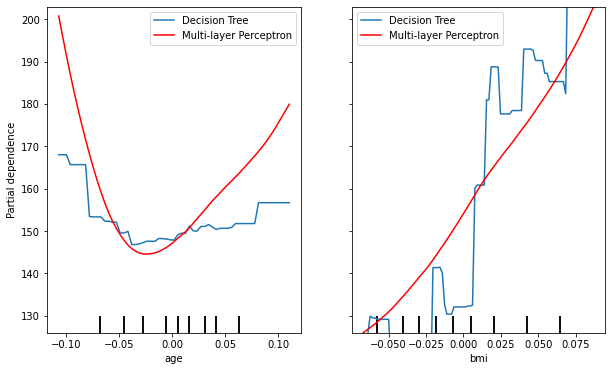

In [11]:
tree_disp.plot(line_kw={"label": "Decision Tree"})
mlp_disp.plot(line_kw={"label": "Multi-layer Perceptron", "c": "red"},
              ax=tree_disp.axes_)
tree_disp.figure_.set_size_inches(10, 6)
tree_disp.axes_[0, 0].legend()
tree_disp.axes_[0, 1].legend()
plt.show()

## Plotting a PD curve for one feature
- in this case: "age".

/home/bjpcjp/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


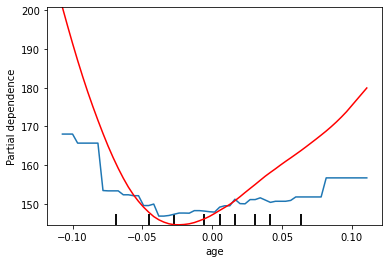

In [12]:
tree_disp = plot_partial_dependence(tree,X,["age"])
mlp_disp = plot_partial_dependence(mlp, X, ["age"],
                                   ax=tree_disp.axes_, line_kw={"c": "red"})